<a href="https://colab.research.google.com/github/russelrk/Customer_Segmentation/blob/main/customer_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import logging

# Configure logging
logging.basicConfig(filename='data_preprocessing.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def load_data(file_path):
    """
    Load the dataset from a CSV file.

    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: The loaded DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
        logging.info("Data loaded successfully.")
        return df
    except FileNotFoundError:
        logging.error(f"File not found at '{file_path}'")
        raise FileNotFoundError(f"File not found at '{file_path}'")
    except Exception as e:
        logging.error(f"An error occurred while loading data: {str(e)}")
        raise Exception(f"An error occurred while loading data: {str(e)}")

def preprocess_and_clean_data(df):
    """
    Preprocess and clean a DataFrame with 10 features and 8000 individuals.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.

    Returns:
    pd.DataFrame: A cleaned and preprocessed DataFrame.
    """
    try:
        # Remove duplicates if any
        df = df.drop_duplicates()

        # Handle missing values (you can customize this based on your data)
        df = df.fillna(df.mean())  # Fill missing values with mean

        # Remove outliers (you can customize this based on your data)
        # Example: Remove rows where a specific feature is beyond a certain threshold
        # df = df[df['feature_name'] < threshold]

        # Encode categorical variables if needed (e.g., one-hot encoding)
        # Example: df = pd.get_dummies(df, columns=['categorical_feature'])

        # Standardize/normalize numerical features if needed
        # Example: df['numeric_feature'] = (df['numeric_feature'] - df['numeric_feature'].mean()) / df['numeric_feature'].std()

        # Feature engineering (create new features if needed)

        # Drop unnecessary columns if any
        # Example: df.drop(['unnecessary_feature1', 'unnecessary_feature2'], axis=1, inplace=True)

        logging.info("Data preprocessing and cleaning completed.")
        return df
    except Exception as e:
        logging.error(f"An error occurred during data preprocessing and cleaning: {str(e)}")
        raise Exception(f"An error occurred during data preprocessing and cleaning: {str(e)}")

if __name__ == "__main__":
    try:
        # Load the dataset
        df_train = load_data("sample_data/Train.csv")

        # Preprocess and clean the data
        df_cleaned_preprocessed = preprocess_and_clean_data(df_train.copy())

        # You can further process or analyze the cleaned data here or save it to a new file.
    except Exception as e:
        logging.error(f"An error occurred: {str(e)}")


<ipython-input-4-68cd5c5d51cb>:43: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())  # Fill missing values with mean


In [ ]:
df_cleaned_preprocessed

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.000000,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.000000,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.000000,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.000000,Low,4.0,Cat_6,B


<ipython-input-4-68cd5c5d51cb>:43: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())  # Fill missing values with mean


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 756.4+ KB


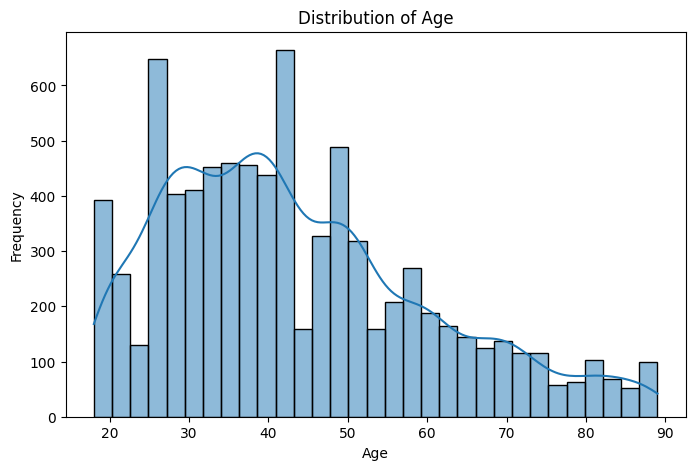

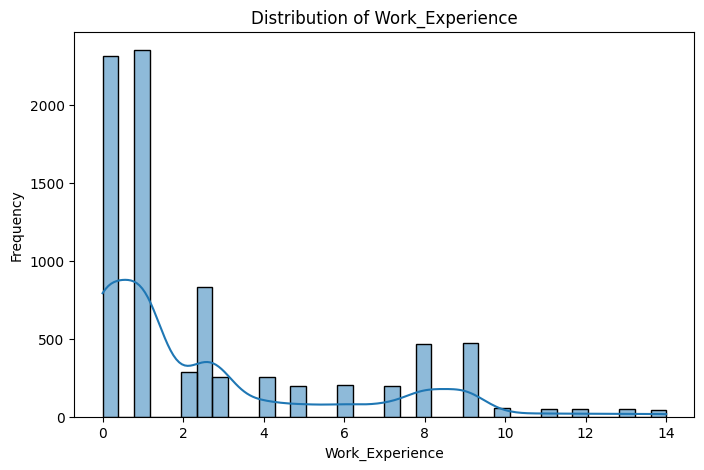

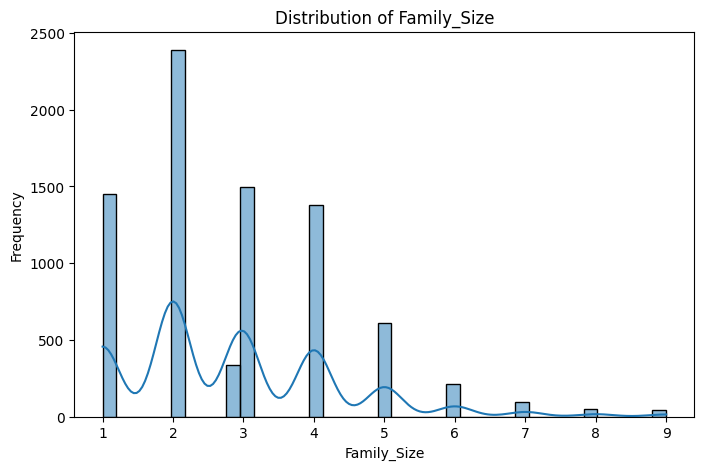

<ipython-input-11-32b2c422f05f>:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)


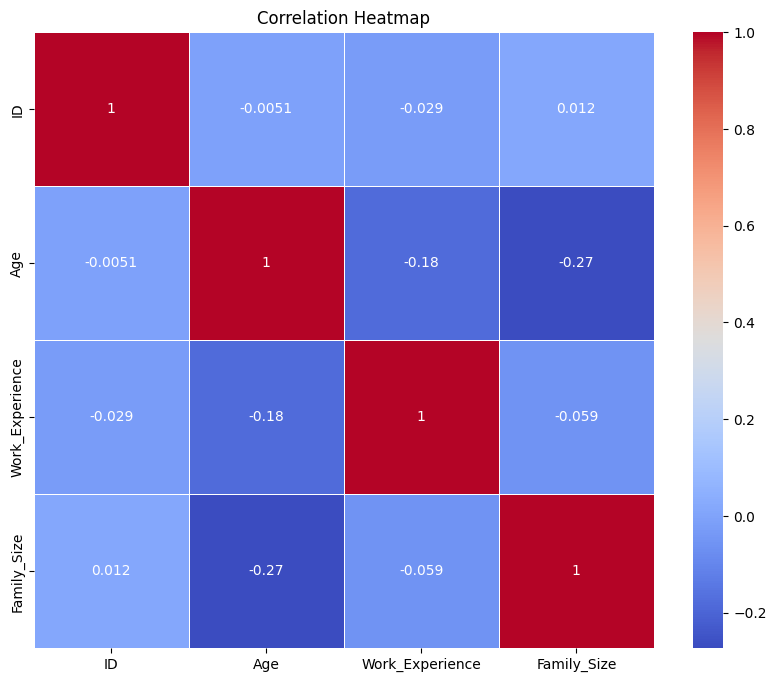

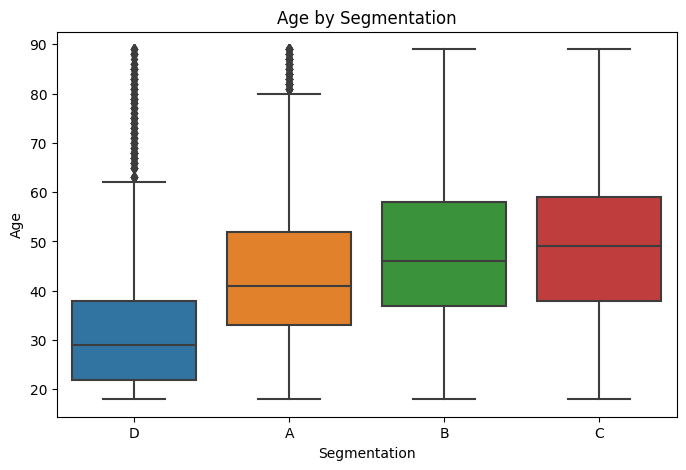

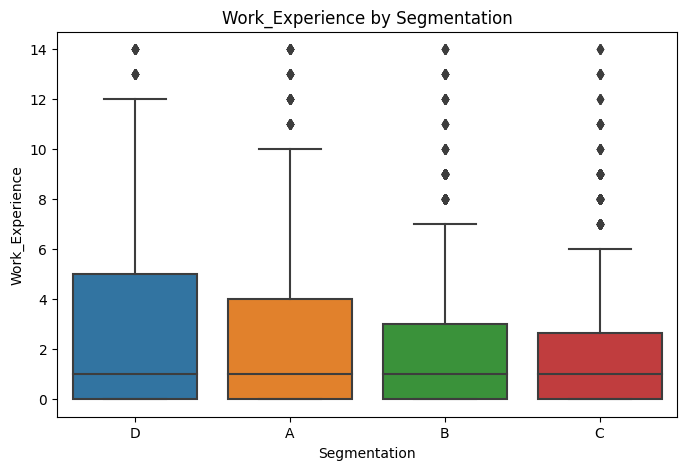

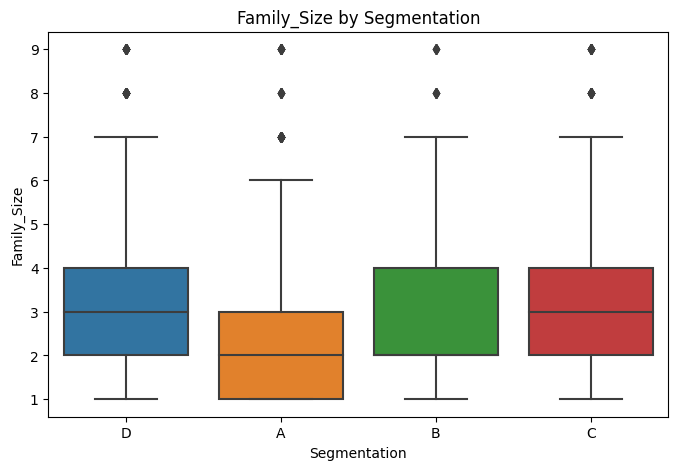

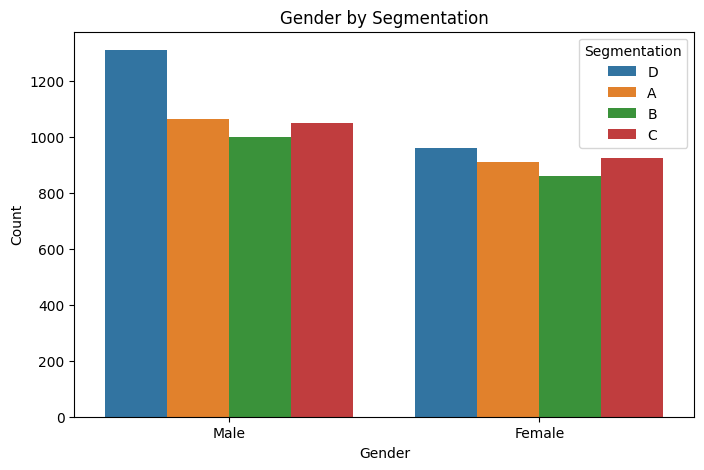

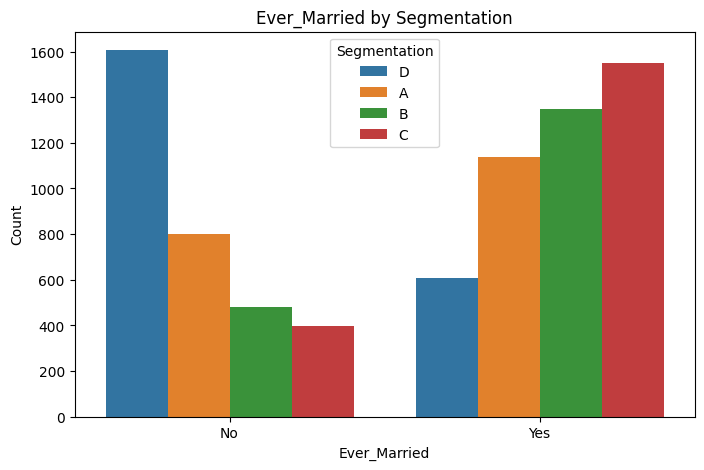

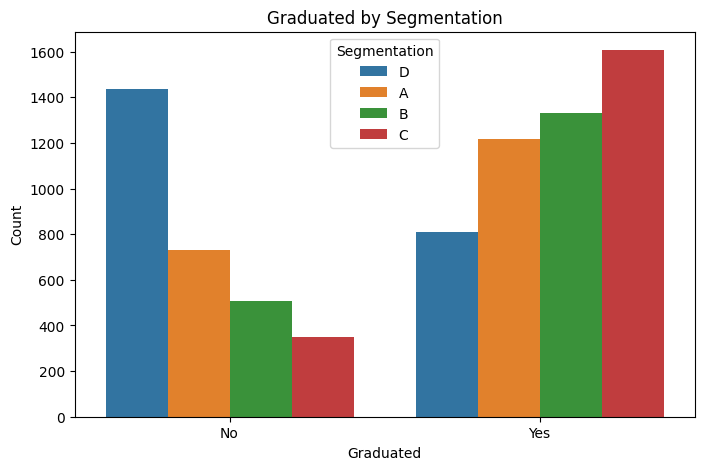

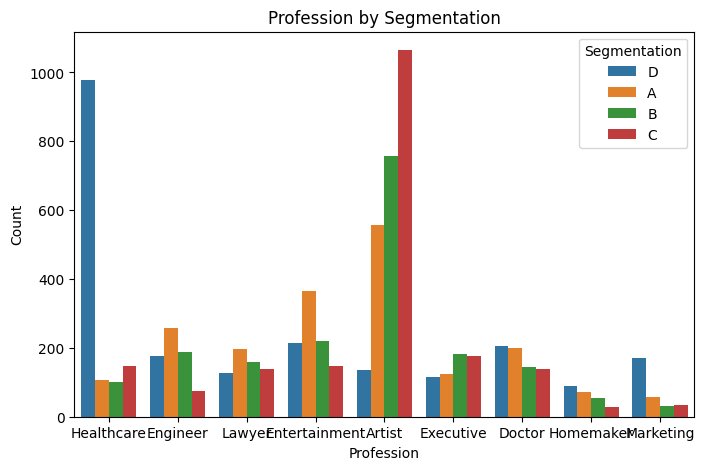

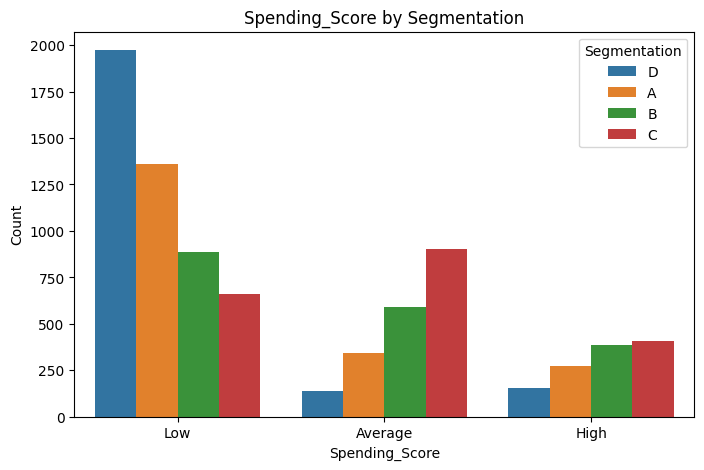

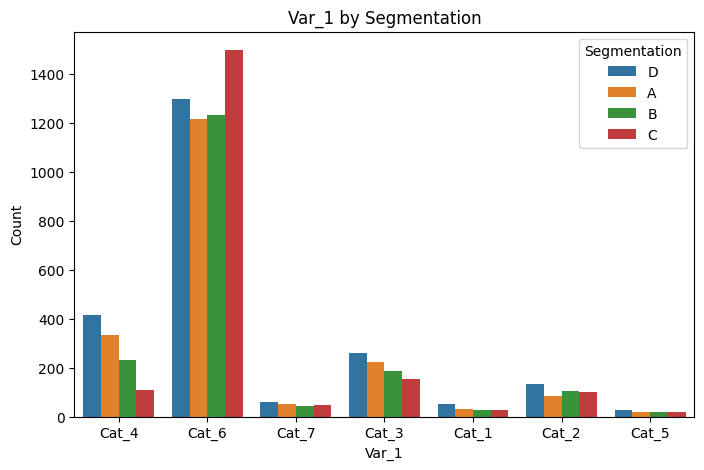

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from .data_preprocess import load_data, preprocess_and_clean_data
import logging

# Configure logging
logging.basicConfig(filename='data_preprocessing.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def explore_data(df):
    """
    Perform exploratory data analysis (EDA) on the DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data.

    Returns:
    None
    """
    try:
        # Summary statistics
        logging.info("Summary Statistics:")
        logging.info(df.describe())

        # Data types and missing values
        logging.info("\nData Types and Missing Values:")
        logging.info(df.info())

        # Distribution of categorical variables
        categorical_columns = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1", "Segmentation"]
        for col in categorical_columns:
            logging.info("\nDistribution of %s", col)
            logging.info(df[col].value_counts())

        # Distribution of numerical variables
        numerical_columns = ["Age", "Work_Experience", "Family_Size"]
        for col in numerical_columns:
            plt.figure(figsize=(8, 5))
            sns.histplot(df[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.show()

        # Correlation heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
        plt.title("Correlation Heatmap")
        plt.show()

        # Box plots for numerical variables by Segmentation
        for col in numerical_columns:
            plt.figure(figsize=(8, 5))
            sns.boxplot(x="Segmentation", y=col, data=df)
            plt.title(f"{col} by Segmentation")
            plt.xlabel("Segmentation")
            plt.ylabel(col)
            plt.show()

        # Countplot for categorical variables by Segmentation
        for col in categorical_columns[:-1]:  # Exclude "Segmentation" from categorical columns
            plt.figure(figsize=(8, 5))
            sns.countplot(x=col, hue="Segmentation", data=df)
            plt.title(f"{col} by Segmentation")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.legend(title="Segmentation")
            plt.show()

    except Exception as e:
        logging.error(f"An error occurred during data exploration: {str(e)}")
        raise Exception(f"An error occurred during data exploration: {str(e)}")

if __name__ == "__main__":
    try:
        # Load the dataset
        df = load_data("sample_data/Train.csv")

        df_clean_preprocessed = preprocess_and_clean_data(df_train.copy())

        # Perform exploratory data analysis (EDA)
        explore_data(df_clean_preprocessed)
    except Exception as e:
        logging.error(f"Error: {str(e)}")
